# Imports

In [14]:
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np

## Customize

In [2]:
# Customize Pandas settings (eg: DataFrame display)
# Columns
pd.options.display.max_columns = 10
pd.options.display.max_colwidth = 15
pd.options.display.width = 150
# Rows
pd.options.display.max_rows = pd.options.display.min_rows = 6


In [ ]:
# Customize matplotlib
plt.style.use('ggplot')

In [23]:
plt.rcParams['figure.figsize'] = (12, 8)

# Load Data

We will be using ugly holiday sweater data crowdsourced from R-Ladies (and friends) in November/December 2020. If you would like to contribute your own ugly holiday sweater info to this dataset, please fill out this Google Form! See a summary of the data attributes here:

    sweater: entry number
    hs_tf: Do you have a holiday sweater? (Yes/No/NA)
    sparkly: is it sparkly? (Yes/No/NA)
    noise: does it make noise? (Yes/No/NA)
    lights: does it light up? (Yes/No/NA)
    objects: does it have anything attached to it? (Yes/No/NA)
    colors: What colors does it have?
    image_tf: Does it have an image on it? (Yes/No/NA)
    image_desc: User-provided image description


In [3]:
fnm = 'ugly_sweaters.csv'
df = pd.read_csv(fnm, index_col='sweater')
# Show the dataframe
print(f'df shape:\n{df.shape}')
print(f'\nColumn names:\n{df.columns.to_list()}\n')
print(df)

df shape:
(105, 8)

Column names:
['hs_tf', 'sparkly', 'noise', 'lights', 'objects', 'colors', 'image_tf', 'image_desc']

           hs_tf sparkly noise lights objects          colors image_tf      image_desc
sweater                                                                               
sweater1     Yes     Yes    No     No      No  Red, Yellow...      Yes  octopus dre...
sweater2     Yes      No    No     No      No           Green       No             NaN
sweater3     Yes      No    No     No      No  Red, Yellow...      Yes          Houses
...          ...     ...   ...    ...     ...             ...      ...             ...
sweater105   Yes      No    No     No      No  Red, Green,...       No             NaN
sweater106    No      No    No     No      No             NaN       No             NaN
sweater107   Yes      No    No     No     Yes  Red, Green,...      Yes  a llama wea...

[105 rows x 8 columns]


## Filter Data

In [4]:
# Filter to only include Holiday Sweaters
data = df.loc[df.hs_tf == 'Yes']
# Make a copy (instead of a view) since we'll be changing
# col dtypes later and don't want to get SettingWithCopyWarning
data = data.copy()
print(data)

           hs_tf sparkly noise lights objects          colors image_tf      image_desc
sweater                                                                               
sweater1     Yes     Yes    No     No      No  Red, Yellow...      Yes  octopus dre...
sweater2     Yes      No    No     No      No           Green       No             NaN
sweater3     Yes      No    No     No      No  Red, Yellow...      Yes          Houses
...          ...     ...   ...    ...     ...             ...      ...             ...
sweater104   Yes     Yes    No     No     Yes  Red, White,...      Yes  R2D2 wearin...
sweater105   Yes      No    No     No      No  Red, Green,...       No             NaN
sweater107   Yes      No    No     No     Yes  Red, Green,...      Yes  a llama wea...

[68 rows x 8 columns]


# Wrangle Data

## Calc number of 'colors'

In [5]:
print(data.colors)

sweater
sweater1      Red, Yellow...
sweater2               Green
sweater3      Red, Yellow...
                   ...      
sweater104    Red, White,...
sweater105    Red, Green,...
sweater107    Red, Green,...
Name: colors, Length: 68, dtype: object


In [6]:
# Convert 'colors' column from single comma-delim str to list
# of string
data['colors_ls'] = data.colors.str.split(',')
print(data.colors_ls)

sweater
sweater1      [Red,  Yell...
sweater2             [Green]
sweater3      [Red,  Yell...
                   ...      
sweater104    [Red,  Whit...
sweater105    [Red,  Gree...
sweater107    [Red,  Gree...
Name: colors_ls, Length: 68, dtype: object


In [7]:
# Calculate how many colors are present & assign to new column
data['num_colors'] = data.colors_ls.apply(lambda x: len(x))
print(data)

           hs_tf sparkly noise lights objects          colors image_tf      image_desc       colors_ls  num_colors
sweater                                                                                                           
sweater1     Yes     Yes    No     No      No  Red, Yellow...      Yes  octopus dre...  [Red,  Yell...           5
sweater2     Yes      No    No     No      No           Green       No             NaN         [Green]           1
sweater3     Yes      No    No     No      No  Red, Yellow...      Yes          Houses  [Red,  Yell...           6
...          ...     ...   ...    ...     ...             ...      ...             ...             ...         ...
sweater104   Yes     Yes    No     No     Yes  Red, White,...      Yes  R2D2 wearin...  [Red,  Whit...           3
sweater105   Yes      No    No     No      No  Red, Green,...       No             NaN  [Red,  Gree...           4
sweater107   Yes      No    No     No     Yes  Red, Green,...      Yes  a llama 

## Calc len of 'image_desc'

In [8]:
# Replace NaN with empty str
data.image_desc.fillna('', inplace=True)
print(data)

           hs_tf sparkly noise lights objects          colors image_tf      image_desc       colors_ls  num_colors
sweater                                                                                                           
sweater1     Yes     Yes    No     No      No  Red, Yellow...      Yes  octopus dre...  [Red,  Yell...           5
sweater2     Yes      No    No     No      No           Green       No                         [Green]           1
sweater3     Yes      No    No     No      No  Red, Yellow...      Yes          Houses  [Red,  Yell...           6
...          ...     ...   ...    ...     ...             ...      ...             ...             ...         ...
sweater104   Yes     Yes    No     No     Yes  Red, White,...      Yes  R2D2 wearin...  [Red,  Whit...           3
sweater105   Yes      No    No     No      No  Red, Green,...       No                  [Red,  Gree...           4
sweater107   Yes      No    No     No     Yes  Red, Green,...      Yes  a llama 

In [9]:
# Convert 'image_desc' column from single space-delim str to list
data['image_desc_ls'] = data.image_desc.str.split()
print(data.image_desc_ls)

sweater
sweater1      [octopus, d...
sweater2                  []
sweater3            [Houses]
                   ...      
sweater104    [R2D2, wear...
sweater105                []
sweater107    [a, llama, ...
Name: image_desc_ls, Length: 68, dtype: object


In [10]:
# Calculate how many image_desc words are present & assign to new column
data['num_words'] = data.image_desc_ls.apply(lambda x: len(x))
print(data)

           hs_tf sparkly noise lights objects  ...      image_desc       colors_ls num_colors   image_desc_ls  num_words
sweater                                        ...                                                                      
sweater1     Yes     Yes    No     No      No  ...  octopus dre...  [Red,  Yell...          5  [octopus, d...          4
sweater2     Yes      No    No     No      No  ...                         [Green]          1              []          0
sweater3     Yes      No    No     No      No  ...          Houses  [Red,  Yell...          6        [Houses]          1
...          ...     ...   ...    ...     ...  ...             ...             ...        ...             ...        ...
sweater104   Yes     Yes    No     No     Yes  ...  R2D2 wearin...  [Red,  Whit...          3  [R2D2, wear...          5
sweater105   Yes      No    No     No      No  ...                  [Red,  Gree...          4              []          0
sweater107   Yes      No    No  

# Visualize

In [23]:
# Change default plot size
plt.rcParams['figure.figsize'] = (12, 8)

## Pandas' plotter tools

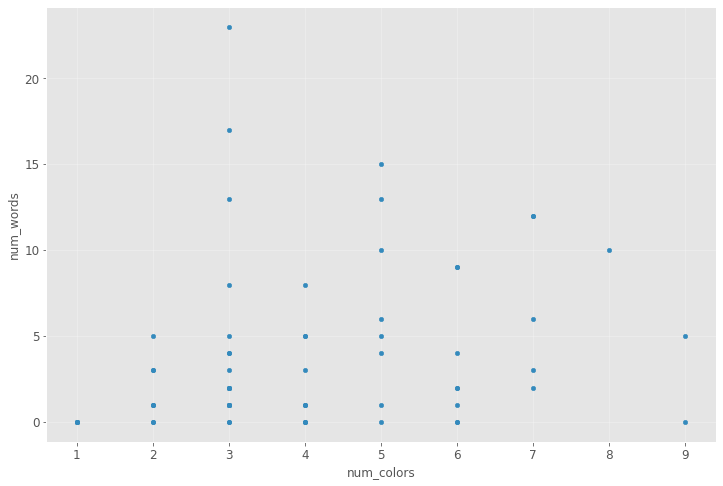

In [24]:
# Pandas built-in plot tools (which use Matplotlib under the hood)
# This is convenient, but doesn't give as much control as using the Matplotlib API
data.plot.scatter('num_colors', 'num_words');

## Matplotlib API

In [76]:
# There are many pre-defined styles... view the available options
mpl.style.available
# or use the default style
mpl.style.use('default')

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [105]:
# Matplotlib scatter plot doesn't have built-in jitter option...
# but it's not too hard

def jitterify(arr, factor=0.01):
    """Add jitter 'factor' to 'arr' data
    :param arr: array-like, eg: list, ndarray
    :param factor: float, 0.0 -> 1.0
    :return: arr with added jitter
    """
    assert 0.0 < factor < 1.0, f"Error, invalid factor {factor}"
    arr = np.array(arr)
    assert arr.ndim == 1, f"Expected 1-d array, got {arr.ndim}"
    ptp = arr.ptp()
    jitter = np.random.randn(arr.size) * factor * ptp
    return arr + jitter


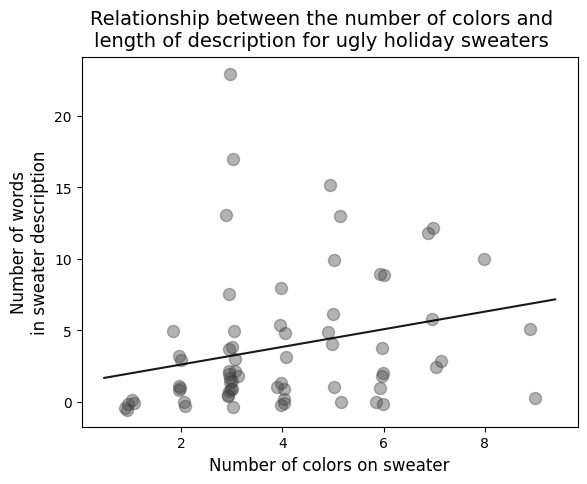

In [104]:
# Scatterplot docs:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

fontsize = 12
markersize = 75
color = '#424242'
alpha = 0.4

# Instantiate plot objects
fig, ax = plt.subplots()

# Add labels to axes
ax.set_xlabel('Number of colors on sweater', fontsize=fontsize, color='k')
ax.set_ylabel('Number of words\nin sweater description', fontsize=fontsize, color='k')
# Add figure title
fig.suptitle("Relationship between the number of colors and\nlength of description for ugly holiday sweaters",
            color='k', fontsize=fontsize + 2)

# Add jitter to data so completely overlapping
x = jitterify(data.num_colors)
y = jitterify(data.num_words)
# Plot
ax.scatter(x, y,
            c=color,
            s=markersize,
            alpha=alpha,
            edgecolors=color,
            linewidths=1.
           )

# Add polyfit curve
coeffs = np.polyfit(data.num_colors, data.num_words, 1)
xlim = ax.get_xlim()
ax.plot(xlim, np.polyval(coeffs, xlim), color='k', alpha=0.9)

# Set tick increment
incr_x = 2
incr_y = 5
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(incr_x))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(incr_y))

## Seaborn library
This library is designed with data-science and clean asthetics in mind... check it out!<br>
https://seaborn.pydata.org/